## Simple Example of a Multiple Linear Regression in Python
- Example is using a subset of prepared sales data (feature engineering and encoding already applied)
##### Scarlett Desmarais

In [1]:
# Load libs
import pandas as pd
import os.path as osp
import matplotlib.pyplot as plt

import numpy as np
from numpy import sqrt

import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy.stats as stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
# Import data
path = osp.join(
    osp.curdir, 'Documents', 'Data', 'Ready Sales Data.xlsx')

df = pd.read_excel(
    path, sheet_name='Sales Data', index_col='Observation')

df.head()

,Order_Size,Ad_Budget,Male,Distance
Observation,,,,
1,20.77,3975,0,20
2,49.52,10897,0,5
3,66.40,15067,0,4
4,34.43,5898,0,4
5,98.65,24928,0,11


In [3]:
# Summary stats
df.dtypes
df.info()
df.describe()

Order_Size    float64
Ad_Budget       int64
Male            int64
Distance        int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order_Size  200 non-null    float64
 1   Ad_Budget   200 non-null    int64  
 2   Male        200 non-null    int64  
 3   Distance    200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 7.8 KB


,Order_Size,Ad_Budget,Male,Distance
count,200.000000,200.000000,200.000000,200.000000
mean,56.575000,10489.520000,0.280000,8.320000
std,22.310774,6616.043323,0.450126,4.555366
min,8.550000,-2883.000000,0.000000,1.000000
25%,38.712500,5312.750000,0.000000,5.000000
50%,58.325000,9589.000000,0.000000,7.000000
75%,71.532500,14443.500000,1.000000,10.000000
max,135.300000,36039.000000,1.000000,25.000000


In [4]:
# Split into train & test

X = df[['Ad_Budget', 'Distance']].values # Converting df to np array for sklearn
y = df['Order_Size'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=0)

In [5]:
# Fit a regresion model
reg = LinearRegression().fit(X_train, y_train)

In [6]:
# Assess model
print('R-Squared:', reg.score(X_train, y_train).round(4))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_train, reg.predict(X_train))).round(4))
print('Mean Absolute Error:', mean_absolute_error(y_train, reg.predict(X_train)).round(4))

R-Squared: 0.6467
Root Mean Squared Error: 12.7285
Mean Absolute Error: 9.8913


In [7]:
# Compute intercepts
print("B_0 =", reg.intercept_.round(4))
print("B_1=", reg.coef_[0].round(4))
print("B_2=", reg.coef_[1].round(4))

B_0 = 25.5257
B_1= 0.0027
B_2= 0.25


In [8]:
# Test if model makes sense
# What would be the predicted order size if Ad_Budget is 1000 and Distance is 50?
reg.predict(np.array([1000,50]).reshape(1,-1))[0]

40.73317438381978

In [9]:
# Model Stats
model = ols('Order_Size ~ Ad_Budget + Distance', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Order_Size   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     178.6
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           5.64e-45
Time:                        20:53:54   Log-Likelihood:                -800.86
No. Observations:                 200   AIC:                             1608.
Df Residuals:                     197   BIC:                             1618.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8988      2.583     10.415      0.0

Text(0.5, 1.0, 'Residual vs Fitted Values')

Text(0.5, 0, 'Model Prediction')

Text(0, 0.5, 'Residual')

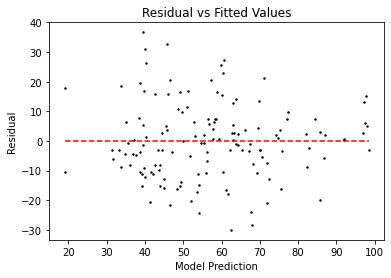

Mean of Residuals: -1.6240976817373718e-15


In [10]:
# Residual analysis
y_pred = reg.predict(X_train)
residuals = y_train - y_pred

plt.scatter(y_pred, residuals, s=2, c='black')
plt.hlines(0, min(y_pred), max(y_pred), color='red', linestyles='dashed')

plt.title('Residual vs Fitted Values')
plt.xlabel('Model Prediction')
plt.ylabel('Residual')
plt.show()

print('Mean of Residuals:', residuals.mean())

((array([-2.58008395, -2.25755827, -2.07246841, -1.93925459, -1.83356285,
         -1.74509992, -1.66850236, -1.60060421, -1.53937335, -1.4834242 ,
         -1.43176772, -1.38367212, -1.33858   , -1.29605654, -1.25575566,
         -1.21739717, -1.18075087, -1.14562518, -1.11185886, -1.07931483,
         -1.0478755 , -1.01743921, -0.9879174 , -0.95923242, -0.93131579,
         -0.90410674, -0.87755111, -0.85160037, -0.82621084, -0.80134306,
         -0.77696125, -0.75303281, -0.72952797, -0.70641944, -0.68368215,
         -0.66129295, -0.63923044, -0.6174748 , -0.59600758, -0.57481159,
         -0.55387076, -0.53317006, -0.51269537, -0.4924334 , -0.47237162,
         -0.45249819, -0.4328019 , -0.41327211, -0.39389871, -0.37467204,
         -0.35558289, -0.33662246, -0.31778228, -0.29905424, -0.28043052,
         -0.26190357, -0.24346608, -0.225111  , -0.20683146, -0.18862077,
         -0.17047242, -0.15238006, -0.13433743, -0.11633844, -0.09837707,
         -0.08044737, -0.0625435 , -0.

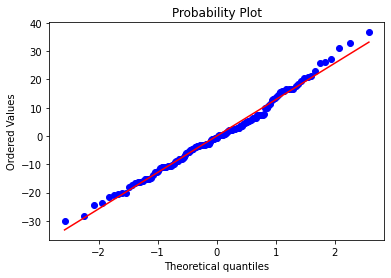

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

stats.probplot(residuals, dist='norm', plot=ax)
plt.show()

Text(0.5, 1.0, 'Scale-Location Plot')

Text(0.5, 0, 'Fitted Values')

Text(0, 0.5, 'Root of standardized residual')

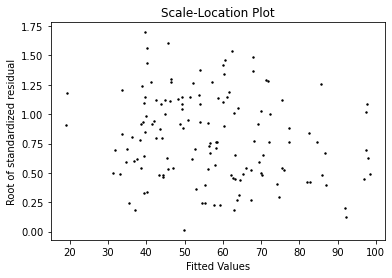

In [12]:
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

plt.scatter(y_pred, np.sqrt(np.abs(norm_residuals)), c='black', s=2)
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Root of standardized residual')
plt.show()

(array([0.00278574, 0.0097501 , 0.01392871, 0.01950019, 0.02228593,
        0.04039325, 0.03203603, 0.01810732, 0.01253584, 0.01392871,
        0.00417861, 0.00278574, 0.00278574]),
 array([-29.99665968, -24.86850489, -19.7403501 , -14.61219531,
         -9.48404052,  -4.35588573,   0.77226906,   5.90042385,
         11.02857864,  16.15673343,  21.28488822,  26.41304301,
         31.5411978 ,  36.66935259]),
 <BarContainer object of 13 artists>)

Text(0.5, 1.0, 'Density Plot')

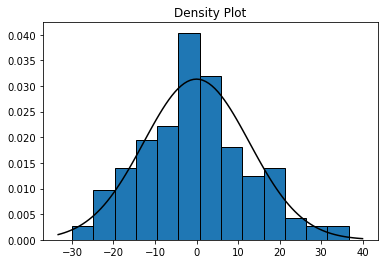

Fit results: mu = -0.00, std = 12.73


In [13]:
mean, std = norm.fit(residuals)

plt.hist(residuals, bins=13, edgecolor='black', density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
plt.title('Density Plot')
plt.show()

summary = 'Fit results: mu = %.2f, std = %.2f' % (mean,std)
print(summary)

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

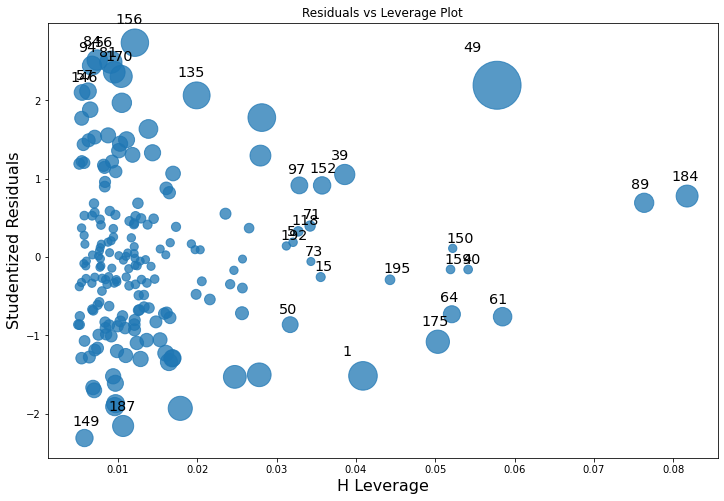

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.title('Residuals vs Leverage Plot')
plt.show()

In [15]:
# Predict future values
print(reg.predict(X_test[0:5]))

[52.24761697 42.06464247 30.35556766 38.2041164  54.51690398]


In [16]:
# Assess model on test data
print('R-Squared:', reg.score(X_test, y_test).round(4))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, reg.predict(X_test))).round(4))
print('Mean Absolute Error:', mean_absolute_error(y_test, reg.predict(X_test)).round(4))

R-Squared: 0.6362
Root Mean Squared Error: 14.5108
Mean Absolute Error: 11.1929


In [17]:
# Export predicted values
df_pred = pd.DataFrame(X_test, columns=['Ad_Budget', 'Distance'])
df_pred['Order_Size_Pred'] = y_test
df_pred.head()

df_pred.to_csv('Sales Data Predictions.csv')

,Ad_Budget,Distance,Order_Size_Pred
0,9585,3,53.16
1,5089,11,49.49
2,1229,6,14.03
3,4310,4,28.18
4,9869,9,49.94
